In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
from wm import Image as Image
from wm.moments import RadialHarmonicFourierMoment
from wm.moments import ZernikeMoment
from wm.moments import PseudoZernikeMoment

In [4]:
w = np.random.randint(2, size=8)

## RHFM

In [5]:
N = 64
order = 32
im = Image('lena_'+str(N)+'.png')
RHFM = RadialHarmonicFourierMoment(order, N)

In [6]:
%%time
E = RHFM.encode(im.grey, w, verbose=True)

CPU times: user 1min 10s, sys: 136 ms, total: 1min 10s
Wall time: 1min 10s


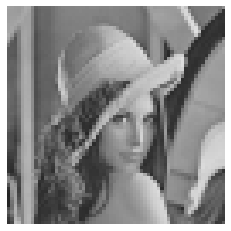

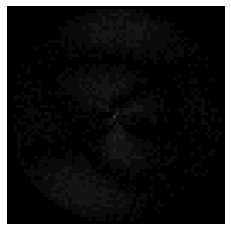

In [7]:
E.show()
imdiff = np.abs(im.grey.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [8]:
%%time
w2 = RHFM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[1 1 1 1 0 1 0 1]                   
[1 1 1 1 0 1 0 1]


## ZM

In [9]:
N = 64
order = 16
im = Image('lena_'+str(N)+'.png')
ZM = ZernikeMoment(order, N)

In [10]:
%%time
E = ZM.encode(im.grey, w, verbose=True)

CPU times: user 22.7 s, sys: 405 ms, total: 23.2 s
Wall time: 22.6 s


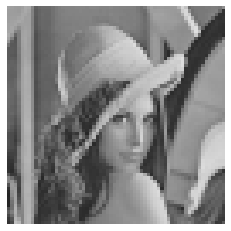

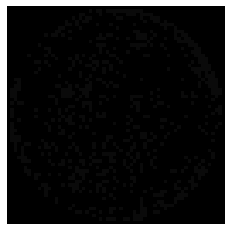

In [11]:
E.show()
imdiff = np.abs(im.grey.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [12]:
%%time
w2 = ZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[1 1 1 1 0 1 0 1]                    
[1 1 1 1 0 1 0 1]
CPU times: user 10.5 s, sys: 276 ms, total: 10.7 s
Wall time: 10.3 s


## PZM

In [13]:
N = 64
order = 16
im = Image('lena_'+str(N)+'.png')
PZM = PseudoZernikeMoment(order, N)

In [14]:
%%time
E = PZM.encode(im.grey, w, verbose=True)

CPU times: user 24 s, sys: 325 ms, total: 24.3 s
Wall time: 23.8 s


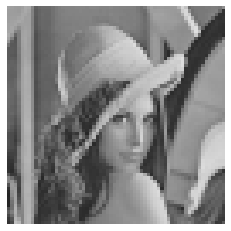

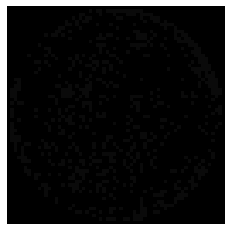

In [15]:
E.show()
imdiff = np.abs(im.grey.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [16]:
%%time
w2 = PZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[1 1 1 1 0 1 0 1]                    
[1 1 1 1 0 1 0 1]
